In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import seaborn as sns
from collections import Counter

In [2]:
tweets = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-06-15/tweets.csv')

In [16]:
tweets.columns

Index(['datetime', 'content', 'retweet_count', 'like_count', 'quote_count',
       'text', 'username', 'location', 'followers', 'url', 'verified', 'lat',
       'long'],
      dtype='object')

AttributeError: 'AxesSubplot' object has no attribute 'despine'

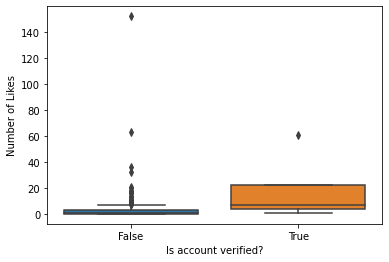

In [87]:
ax = sns.boxplot(x='verified', y='retweet_count', data=tweets)
ax.set(xlabel='Is account verified?', ylabel='Number of Likes')
ax.despine(left=True)
plt.title('Accounts that are verified generally get more "likes" but the tweets with the greatest \n number of "likes came from unverified accounts')
plt.show()

In [95]:
top_linked_twitter_accounts = Counter([re.findall(r'https://twitter.com/(\w+)', x)[0] for x in list(set(tweets.url))[1:]])
top_linked_twitter_accounts = pd.DataFrame.from_dict(top_linked_twitter_accounts, orient='index', columns=['Times_linked'])
top_linked_twitter_accounts = top_linked_twitter_accounts.sort_values(['Times_linked'], ascending=False).head(8).reset_index()

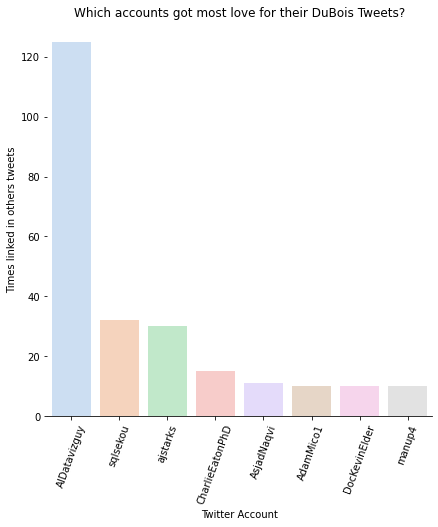

In [96]:
g = sns.catplot(
    data=top_linked_twitter_accounts, kind="bar",
    x="index", y="Times_linked",palette="pastel", alpha=.6, height=6
)
g.despine(left=True)
g.set(xlabel='Twitter Account', ylabel='Times linked in others tweets')
g.set_xticklabels(rotation=70)
plt.title('Which accounts got most love for their DuBois Tweets?')
plt.show()

In [3]:
tpv = pd.read_csv('~/Desktop/tpv_stats.csv', names=['Player','Games','Minutes','Goals','Assists','YC','RC'], skiprows=1)

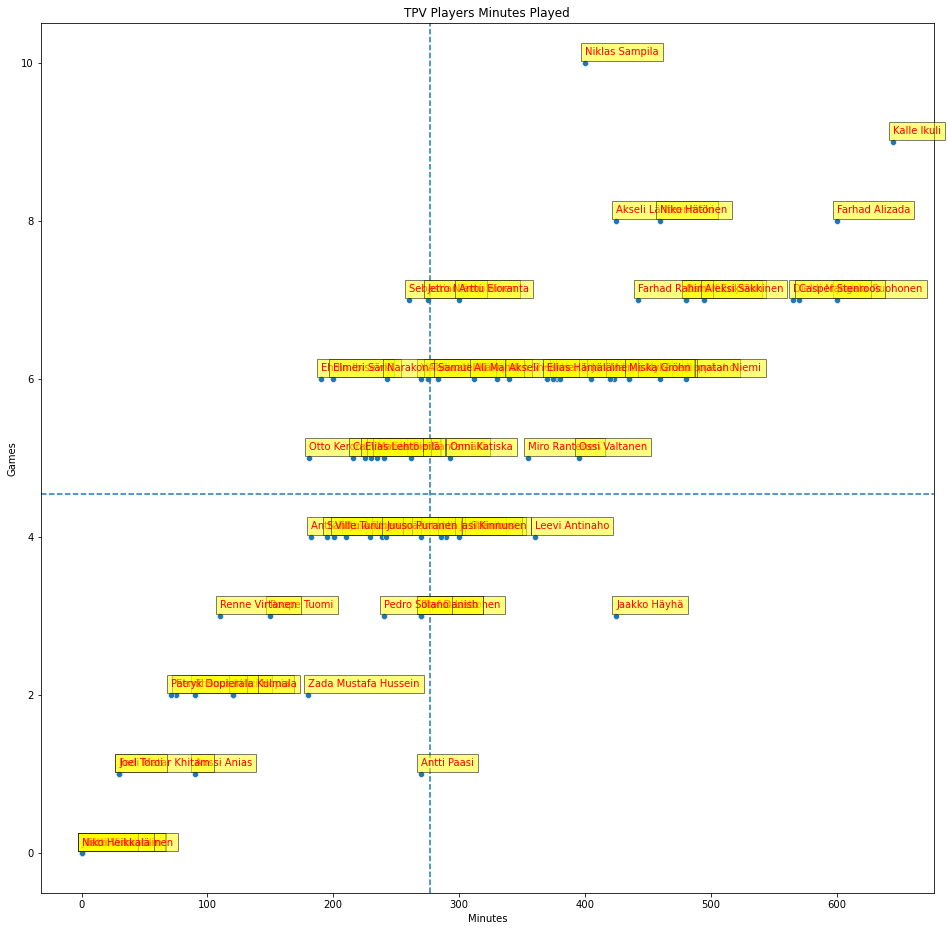

In [4]:
plt.figure(figsize=(16, 16))

ax = sns.scatterplot(x='Minutes', y='Games', data=tpv)
ax.axvline(np.mean(tpv.Minutes), ls='--')
ax.axhline(np.mean(tpv.Games), ls='--')

for i in range(tpv.shape[0]):
     plt.text(x=tpv.Minutes[i]+0.1,y=tpv.Games[i]+0.1,s=tpv.Player[i], 
              fontdict=dict(color='red',size=10),
              bbox=dict(facecolor='yellow',alpha=0.5))

plt.title('TPV Players Minutes Played')
plt.show()